# Personal Projects

In [ ]:
#library
from pyspark import SparkContext
import pandas as pd
from pandas import *
import seaborn as sns
import itertools
from collections import defaultdict

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import ast

import numpy as np

SEED = 42

In [0]:
project_data = spark.sql("select * from techcost.data_raw_test")

In [0]:
data_pd = project_data.toPandas()

In [0]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 40 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 FileName 2126 non-null object
 1 Date 2126 non-null object
 2 SegFile 2126 non-null object
 3 b3 2126 non-null int32 
 4 e4 2126 non-null int32 
 5 LBE 2126 non-null int32 
 6 LB 2126 non-null int32 
 7 AC 2126 non-null int32 
 8 FM 2126 non-null int32 
 9 UC 2126 non-null int32 
 10 ASTV 2126 non-null int32 
 11 MSTV 2126 non-null object
 12 ALTV 2126 non-null int32 
 13 MLTV 2126 non-null object
 14 DL 2126 non-null int32 
 15 DS 2126 non-null int32 
 16 DP 2126 non-null int32 
 17 DR 2126 non-null int32 
 18 Width 2126 non-null int32 
 19 Min 2126 non-null int32 
 20 Max 2126 non-null int32 
 21 Nmax 2126 non-null int32 
 22 Nzeros 2126 non-null int32 
 23 Mode 2126 non-null int32 
 24 Mean 2126 non-null int32 
 25 Median 2126 non-null int32 
 26 Variance 2126 non-null int32 
 27 Tendency 2126 non-null int32 
 28 A 2126 non-null int32 
 29 B29 2126 non-null int32 
 30 C 2126 non-null int32 
 31 D 2126 non-null int32 
 32 E32 2126 non-null int32 
 33 AD 2126 non-null int32 
 34 DE 2126 non-null int32 
 35 LD 2126 non-null int32 
 36 FS 2126 non-null int32 
 37 SUSP 2126 non-null int32 
 38 CLASS 2126 non-null int32 
 39 NSP 2126 non-null int32 
dtypes: int32(35), object(5)
memory usage: 373.8+ KB

In [0]:
data_pd.dtypes

Out[5]: FileName object
Date object
SegFile object
b3 int32
e4 int32
LBE int32
LB int32
AC int32
FM int32
UC int32
ASTV int32
MSTV object
ALTV int32
MLTV object
DL int32
DS int32
DP int32
DR int32
Width int32
Min int32
Max int32
Nmax int32
Nzeros int32
Mode int32
Mean int32
Median int32
Variance int32
Tendency int32
A int32
B29 int32
C int32
D int32
E32 int32
AD int32
DE int32
LD int32
FS int32
SUSP int32
CLASS int32
NSP int32
dtype: object

In [0]:
data_pd.select_dtypes(include=['object'])

,FileName,Date,SegFile,MSTV,MLTV
0,Variab10.txt,01/12/1996,CTG0001.txt,"0,5","2,4"
1,Fmcs_1.txt,03/05/1996,CTG0002.txt,"2,1","10,4"
2,Fmcs_1.txt,03/05/1996,CTG0003.txt,"2,1","13,4"
3,Fmcs_1.txt,03/05/1996,CTG0004.txt,"2,4",23
4,Fmcs_1.txt,03/05/1996,CTG0005.txt,"2,4","19,9"
...,...,...,...,...,...
2121,S8001045.dsp,06/06/1998,CTG2124.txt,"0,2","7,2"
2122,S8001045.dsp,06/06/1998,CTG2125.txt,"0,4","7,1"
2123,S8001045.dsp,06/06/1998,CTG2126.txt,"0,4","6,1"
2124,S8001045.dsp,06/06/1998,CTG2127.txt,"0,4",7


In [0]:
data_pd.drop(columns=["FileName","Date","SegFile", "b3", "e4"], inplace = True)

In [0]:
data_pd["MSTV"]= data_pd["MSTV"].str.replace(",",".").astype(float)
data_pd["MLTV"]= data_pd["MLTV"].str.replace(",",".").astype(float)

In [0]:
data_pd.isnull().sum()

Out[9]: LBE 0
LB 0
AC 0
FM 0
UC 0
ASTV 0
MSTV 0
ALTV 0
MLTV 0
DL 0
DS 0
DP 0
DR 0
Width 0
Min 0
Max 0
Nmax 0
Nzeros 0
Mode 0
Mean 0
Median 0
Variance 0
Tendency 0
A 0
B29 0
C 0
D 0
E32 0
AD 0
DE 0
LD 0
FS 0
SUSP 0
CLASS 0
NSP 0
dtype: int64

In [0]:
x_data = data_pd.drop(columns = ["NSP", "CLASS"])

In [0]:
x_standard = RobustScaler().fit_transform(x_data.values)
x = pd.DataFrame(x_standard)
x.columns = x_data.columns
y = data_pd["NSP"]

In [0]:
rnd_clf = DecisionTreeClassifier(random_state=SEED)
rnd_clf.fit(x, y)

Out[39]: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
 max_depth=None, max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort='deprecated',
 random_state=42, splitter='best')

In [0]:
importance = rnd_clf.feature_importances_
feautures_name = x.columns

In [0]:
def plot_and_select_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  
  #Select feature imp > 0
  feature_most_imp = list(fi_df[fi_df['feature_importance']>0]['feature_names'].values)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')
  
  return feature_most_imp

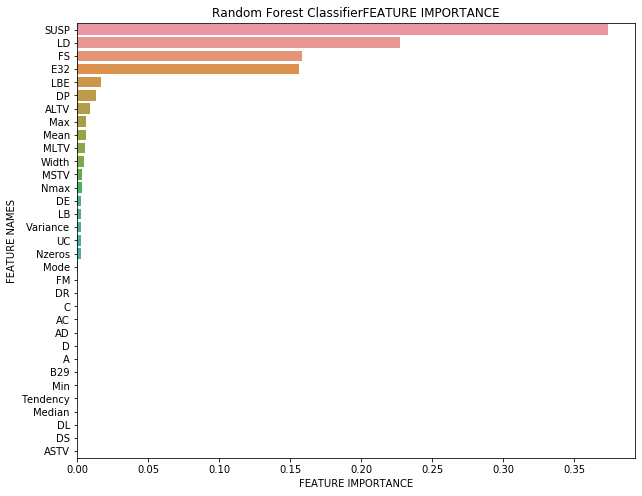

In [0]:
feature_to_select = plot_and_select_importance(importance=importance,names=feautures_name,model_type= "Random Forest Classifier")

In [0]:
feature_to_select = feature_to_select[:5]

In [0]:
feature_to_select

Out[46]: ['SUSP', 'LD', 'FS', 'E32', 'LBE']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x[feature_to_select], y, test_size=0.2, random_state = SEED, stratify = y)

In [0]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(random_state = SEED)
classifier.fit(X_train, y_train)

Out[76]: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=100,
 n_jobs=None, oob_score=False, random_state=42, verbose=0,
 warm_start=False)

In [0]:
y_pred = classifier.predict(X_test)

In [0]:
# Accuracy and f1_weighted value of Final Model

# %% f1 score
import sklearn.metrics as metrics
print("f1_weighted:",metrics.f1_score(y_test, y_pred ,average='weighted'))

# %% Accuracy

print("accuracy:",metrics.accuracy_score(y_test, y_pred))

f1_weighted: 0.9760021572219385
accuracy: 0.9765258215962441

In [0]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

precision recall f1-score support

 1 0.99 0.98 0.99 338
 2 0.86 0.96 0.91 53
 3 1.00 1.00 1.00 35

 accuracy 0.98 426
 macro avg 0.95 0.98 0.97 426
weighted avg 0.98 0.98 0.98 426